In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import ClusterCentroids

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
cc = ClusterCentroids()

In [4]:
res.resample_directory(cc, path, 'ClustCent', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ClustCent/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ClustCent/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [8]:
from common.src import models

cnn20 = models.CNNModel(patience_s=49)
cnn20.create_model()
cnn20.summary()

# Fit Model

In [9]:
cnn_model = cnn20.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 11s 66ms/step - loss: 0.4206 - tp: 4153.0000 - fp: 1068.0000 - tn: 4136.0000 - fn: 1051.0000 - accuracy: 0.7964 - precision: 0.7954 - recall: 0.7980 - auc: 0.8900 - val_loss: 0.3995 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9062
Epoch 2/50
163/163 [==============================] - 10s 59ms/step - loss: 0.2600 - tp: 4667.0000 - fp: 559.0000 - tn: 4645.0000 - fn: 537.0000 - accuracy: 0.8947 - precision: 0.8930 - recall: 0.8968 - auc: 0.9587 - val_loss: 0.3756 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9062
Epoch 3/50
163/163 [==============================] - 9s 58ms/step - loss: 0.2320 - tp: 4753.0000 - fp: 476.0000 - tn: 4734.0000 - fn: 457.0000 - accuracy: 0.9105 - precision: 0.9090 - recall: 0.9123 - auc: 0.9

Epoch 22/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0980 - tp: 5018.0000 - fp: 195.0000 - tn: 5009.0000 - fn: 186.0000 - accuracy: 0.9634 - precision: 0.9626 - recall: 0.9643 - auc: 0.9938 - val_loss: 0.3260 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9082
Epoch 23/50
163/163 [==============================] - 9s 58ms/step - loss: 0.1118 - tp: 4978.0000 - fp: 227.0000 - tn: 4977.0000 - fn: 226.0000 - accuracy: 0.9565 - precision: 0.9564 - recall: 0.9566 - auc: 0.9918 - val_loss: 0.2743 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9609
Epoch 24/50
163/163 [==============================] - 9s 58ms/step - loss: 0.0925 - tp: 5036.0000 - fp: 178.0000 - tn: 5032.0000 - fn: 174.0000 - accuracy: 0.9662 - precision: 0.9659 - recall: 0.9666 - auc: 0.99

Epoch 43/50
163/163 [==============================] - 9s 58ms/step - loss: 0.0673 - tp: 5087.0000 - fp: 120.0000 - tn: 5084.0000 - fn: 117.0000 - accuracy: 0.9772 - precision: 0.9770 - recall: 0.9775 - auc: 0.9968 - val_loss: 0.1798 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9844
Epoch 44/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0559 - tp: 5115.0000 - fp: 98.0000 - tn: 5112.0000 - fn: 95.0000 - accuracy: 0.9815 - precision: 0.9812 - recall: 0.9818 - auc: 0.9974 - val_loss: 0.2245 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9688
Epoch 45/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0710 - tp: 5059.0000 - fp: 147.0000 - tn: 5057.0000 - fn: 145.0000 - accuracy: 0.9719 - precision: 0.9718 - recall: 0.9721 - auc: 0.9968

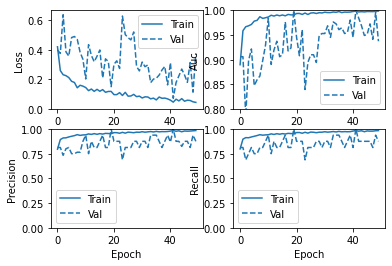

In [10]:
cnn20.plot_history()

In [11]:
cnn20.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.83      0.91      0.87       234
   PNEUMONIA       0.94      0.89      0.91       390

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624



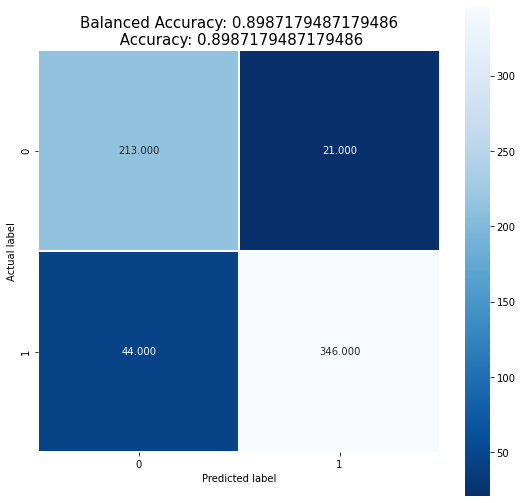

In [12]:
cnn20.display_confusion_matrix(test_set)